# 2017-fordgobike-tripdata
## by Sonika Bidyasar

## Investigation Overview

> Invetigation is to figure out the most frequent time for which the bike is rented.
> Frequencies of riders during different months of the year, days of the week and hours of the day.

## Dataset Overview

> This is a dataset for fordgobike-tripdata from june 2017 to december 2017.
> The data set has 519700 records of bike trips with 13 columns.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe


df_clean=pd.read_csv('clean_fordgoBike_Tripdata.csv')
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,distance,duration_hr,speed,start_time_month,start_time_weekday,start_time_day,start_time_hour,duration_min
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,96,Customer,0.943227,22.252778,0.042387,December,Sun,31,16,1335.166667
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,88,Customer,3.070691,21.888889,0.140285,December,Sun,31,15,1313.333333
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,...,1094,Customer,0.000000,12.713333,0.000000,December,Sun,31,22,762.800000
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,...,2831,Customer,1.046951,17.270000,0.060623,December,Sun,31,17,1036.200000
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,3167,Subscriber,0.636539,12.111944,0.052555,December,Sun,31,14,726.716667


In [3]:
trip_by_hour_df = df_clean.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()
trip_by_hour_df['bike_id'] = (trip_by_hour_df['bike_id']/trip_by_hour_df['bike_id'].sum())*100

## (Peak hours of the day)

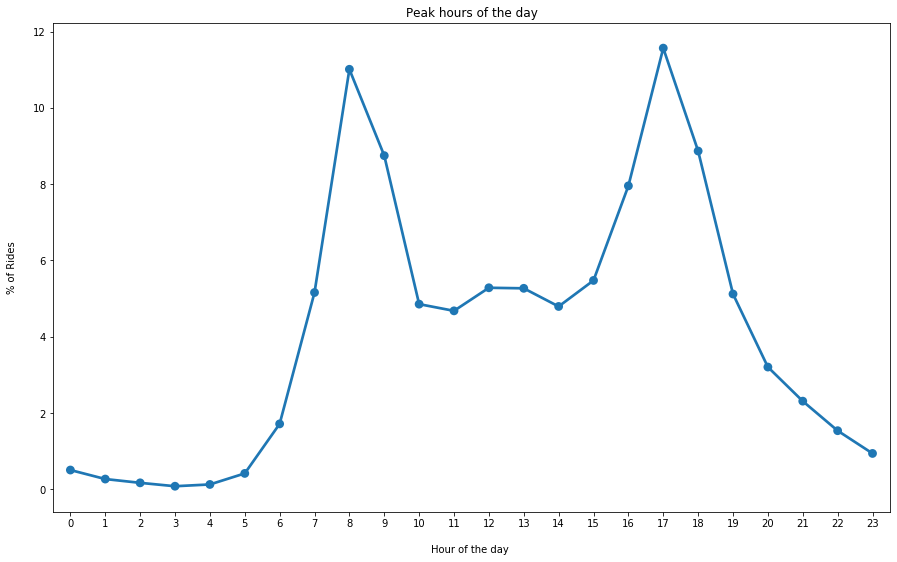

In [4]:

plt.figure(figsize=(15,9))
sb.pointplot(x='start_time_hour', y='bike_id', data=trip_by_hour_df)
plt.title('Peak hours of the day')
plt.xlabel('Hour of the day ', labelpad=16)
plt.ylabel('% of Rides', labelpad=16);



> The daily trend show that the peak hours of bike rental is around 8AM-9AM and 5PM-6PM


## (Weekly Trend of User types)



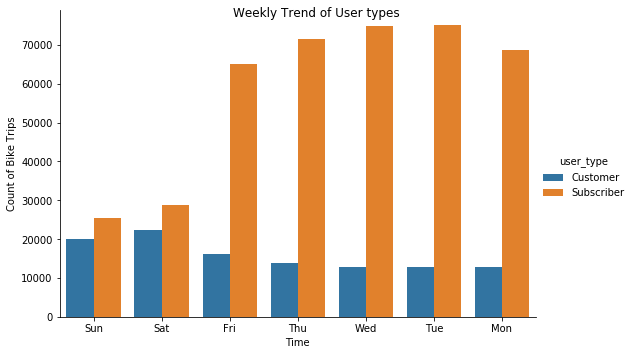

In [5]:
g = sb.catplot(data=df_clean, x='start_time_weekday', hue="user_type", kind='count', aspect=1.5)
g.set_axis_labels("Time", "Count of Bike Trips")
g.set_titles("{col_name}");
plt.suptitle('Weekly Trend of User types');

The customer trend has highest rides during weekends, but the subscribers have the most rides during weekdays

## Daily Trend

Customers have their rentals trend more consistent during afternoons where as subscribers have high number of rides during morning and evenings

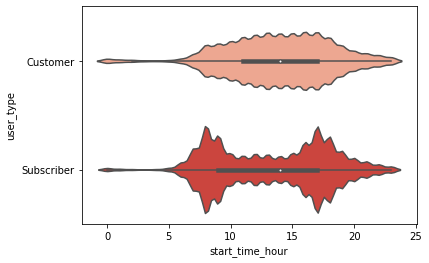

In [7]:
sb.violinplot(x='start_time_hour',y='user_type' ,data=df_clean, palette='Reds', orient='h');

####  surprising interactions between features
Riders with speed < 5 km/hr who are classified as beginners also have the rides of the longest durations, proving that not speed is not the only factor deciding the type of rider. Consistent speed riders have longer duration rides.

### Conclusions:
 Subscribers are more regular in bike riding than customers and have the below trends
 
The Monthly bike rent trend shows that October has the highest number of rides

The customer trend has highest rides in september, but the subscribers hav the most rides in October followed by November

The customer trend has highest rides during weekends, but the subscribers have the most rides during weekdays

The customer trend has highest rides during weekends, but the subscribers have the most rides during weekdays

Experts tend to rent bikes at early morning and late nights